In [1]:
import os
import datetime as dt
# import missingno as msno
import numpy as np
import pandas as pd
import matplotlib  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [2]:
matplotlib.rcParams['figure.figsize'] = (10,3)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 200

In [3]:
netflix = pd.read_csv('netflix_titles.csv')

In [4]:
netflix.head(3)

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm82169                                Rocky  MOVIE   
2   tm17823                               Grease  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  When world heavyweight boxing champion, Apollo...          1976   
2  Australian good girl Sandy and greaser Danny f...          1978   

  age_certification  runtime                 genres production_countries  \
0             TV-MA       51      ['documentation']               ['US']   
1                PG      119     ['drama', 'sport']               ['US']   
2                PG      110  ['romance', 'comedy']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      1.0        NaN         NaN         NaN            0.601         NaN  
1      NaN  tt0075148         8.1    588100.0          106.361       7.782  
2      NaN  tt0077631         7.2    283316.0           33.160       7.406

### How to handle 'missing data' like a PRO 👀😌😉✌🏻😏😎🤓❤️ Why didn't I learn this earlier 😭😩💕

In [5]:
for i in netflix.columns:
    null_rate = netflix[i].isna().sum()/len(netflix) *100
    if null_rate > 0:
        print("{} null rate: {}%".format(i, round(null_rate,2)))

description null rate: 0.37%
age_certification null rate: 44.7%
seasons null rate: 62.42%
imdb_id null rate: 6.45%
imdb_score null rate: 7.63%
imdb_votes null rate: 7.89%
tmdb_popularity null rate: 1.24%
tmdb_score null rate: 4.11%


### Dealing with 'missing values'

In [6]:
netflix_country_missing_data = netflix[netflix.production_countries.isnull()]
netflix_country_missing_data_title = pd.DataFrame(netflix_country_missing_data[['type','title','release_year']])
netflix_country_missing_data_title.head()

Empty DataFrame
Columns: [type, title, release_year]
Index: []

In [7]:
for i in netflix_country_missing_data_title.columns:
    null_rate = netflix_country_missing_data_title[i].isna().sum()/len(netflix_country_missing_data_title) *100
    if null_rate > 0:
        print("{} null rate is {}%".format(i, round(null_rate,2)))

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_53464/775027481.py:2: RuntimeWarning: invalid value encountered in long_scalars
  null_rate = netflix_country_missing_data_title[i].isna().sum()/len(netflix_country_missing_data_title) *100


In [8]:
netflix_content = pd.read_csv('netflix_movies_and_tv_shows_sample_dataset_sample.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'netflix_movies_and_tv_shows_sample_dataset_sample.csv'

In [ ]:
netflix_content = netflix_content[['name','director']]
netflix_content.head()

In [ ]:
for i in netflix_content.columns:
    null_rate = netflix_content[i].isna().sum()/len(netflix_content)
    if null_rate > 0:
        print(" {} null rate is {}%".format(i, round(null_rate,2)))

In [ ]:
netflix_content.rename(columns = {'name': 'title','director':'director_added'}, inplace = True)

In [ ]:
netflix_content.head()

In [ ]:
result = pd.merge(netflix, netflix_content, on = 'title')

In [ ]:
result.head(2)

In [ ]:
for i in result.columns:
    null_rate = result[i].isna().sum()/len(result) *100
    if null_rate >0:
        print("{} null rate is {}%".format(i, round(null_rate,2)))

### The new dataset is not useful at all. Hence, we keep the missing director data as it is...

So we have 6 columns with missing data, we keep director and cast missing values as it is. For the rest, that is 
country, duration, rating and date_added we can use the most common values .i.e., the mode.

In [ ]:
# df['country'] = df['country'].fillna(df['country'].mode()[0])
netflix['country'].mode()# mode has only one value - United States
netflix['country'].mode()[0] # selecting the value at 0th index
# hence using the most common value to fill up all NA values in the country column 
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
# let's see if we can apply the same logic to duration, rating and date_added 
netflix[netflix.duration.isna()]
# netflix['duration'] = netflix['duration'].fillna(['74min','84min','66min'])

In [ ]:
netflix.sample()

In [ ]:
# netflix.duration.unique()

In [ ]:
netflix.loc[netflix['show_id']=='s5542','duration'] = '74 min'
netflix.loc[netflix['show_id']=='s5795','duration'] = '84 min'
netflix.loc[netflix['show_id']=='s5814','duration'] = '66 min'
# duration na values dealt with ✌️ next😏

In [ ]:
netflix[netflix['rating'].isna()]
# netflix['rating'].isna().sum() # 4 values where rating is NA

In [ ]:
netflix.loc[netflix['show_id']=='s7313'] = 'PG'

In [ ]:
netflix.rating.unique()

In [ ]:
netflix.loc[netflix['show_id']=='s6828'] = 'TV-14'

In [ ]:
netflix.loc[netflix['show_id']=='s7538'] = 'PG-13'

In [ ]:
netflix.loc[netflix['show_id']=='s5990'] = 'TV-PG'
# Missing values in rating dealt with 😌💁🏻, next please....

In [ ]:
netflix[netflix.date_added.isna()]
# netflix.date_added.isna().sum() -- 10 missing values 

In [ ]:
netflix.loc[netflix['show_id']== 's6067'] = '2015'
netflix.loc[netflix['show_id']== 's6175'] = 'June 1, 2020'
netflix.loc[netflix['show_id']== 's6796'] = 'April 1, 2015'
netflix.loc[netflix['show_id']== 's6807'] = 'January 1, 2015'
netflix.loc[netflix['show_id']== 's6902'] = 'January 1, 2016'
netflix.loc[netflix['show_id']== 's7197'] = 'July 6, 2017'
netflix.loc[netflix['show_id']== 's7255'] = 'June 1, 2015'
netflix.loc[netflix['show_id']== 's7407'] = 'April 1, 2015'
netflix.loc[netflix['show_id']== 's7848'] = 'January 1, 2014'
netflix.loc[netflix['show_id']== 's8183'] = 'September 15, 2014'

In [ ]:
for i in netflix.columns:
    null_rate = netflix[i].isna().sum()/len(netflix)
    if null_rate > 0:
        print("{} null rate is {}%".format(i,round(null_rate,2)))

In [ ]:
# netflix[netflix['director'].isna()]
netflix['director'].replace(np.nan, 'No data', inplace = True)
netflix['cast'].replace(np.nan, 'No data', inplace = True)

In [ ]:
netflix['cast'].isna().sum()

In [ ]:
# dropping na values 
netflix.dropna(inplace = True)

In [ ]:
netflix.drop_duplicates(inplace = True)

In [ ]:
netflix.isna().sum()
netflix.isnull().sum()
netflix.info()

### We have dealt with the missing values! But ...

In [ ]:
netflix.head()

In [ ]:
# netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

In [ ]:
netflix['date_added'].isna().sum()

In [ ]:
netflix[netflix['date_added'].isna()]

In [ ]:
# netflix.dropna(subset=['date_added'], inplace=True)
netflix.dropna(subset = ['date_added'], inplace = True)

In [ ]:
netflix['date_added'].isna().sum()

In [ ]:
# netflix.drop(5989, inplace = True)

In [ ]:
netflix.loc[5988:5992,]

#### deleted row for index 5989

In [ ]:
# netflix['release_year'] = netflix['release_year'].astype(int)
netflix['release_year'] = pd.to_numeric(netflix['release_year'], errors = 'coerce')

In [ ]:
netflix['release_year'].isna().sum()

In [ ]:
netflix[netflix['release_year'].isna()]

In [ ]:
netflix.dropna(subset = ['release_year'], inplace = True)

In [ ]:
netflix.release_year.isna().sum()

In [ ]:
netflix.info()
netflix.head()

In [ ]:
import datetime

In [ ]:
netflix['year_added'] = pd.to_datetime(netflix['date_added']).dt.year
netflix['month_added'] = pd.to_datetime(netflix['date_added']).dt.month
netflix['month_name_added'] = pd.to_datetime(netflix['date_added']).dt.month_name()

In [ ]:
netflix.head(2)

### Done with data cleaning 🧹 let's begin with the analysis 🧐 

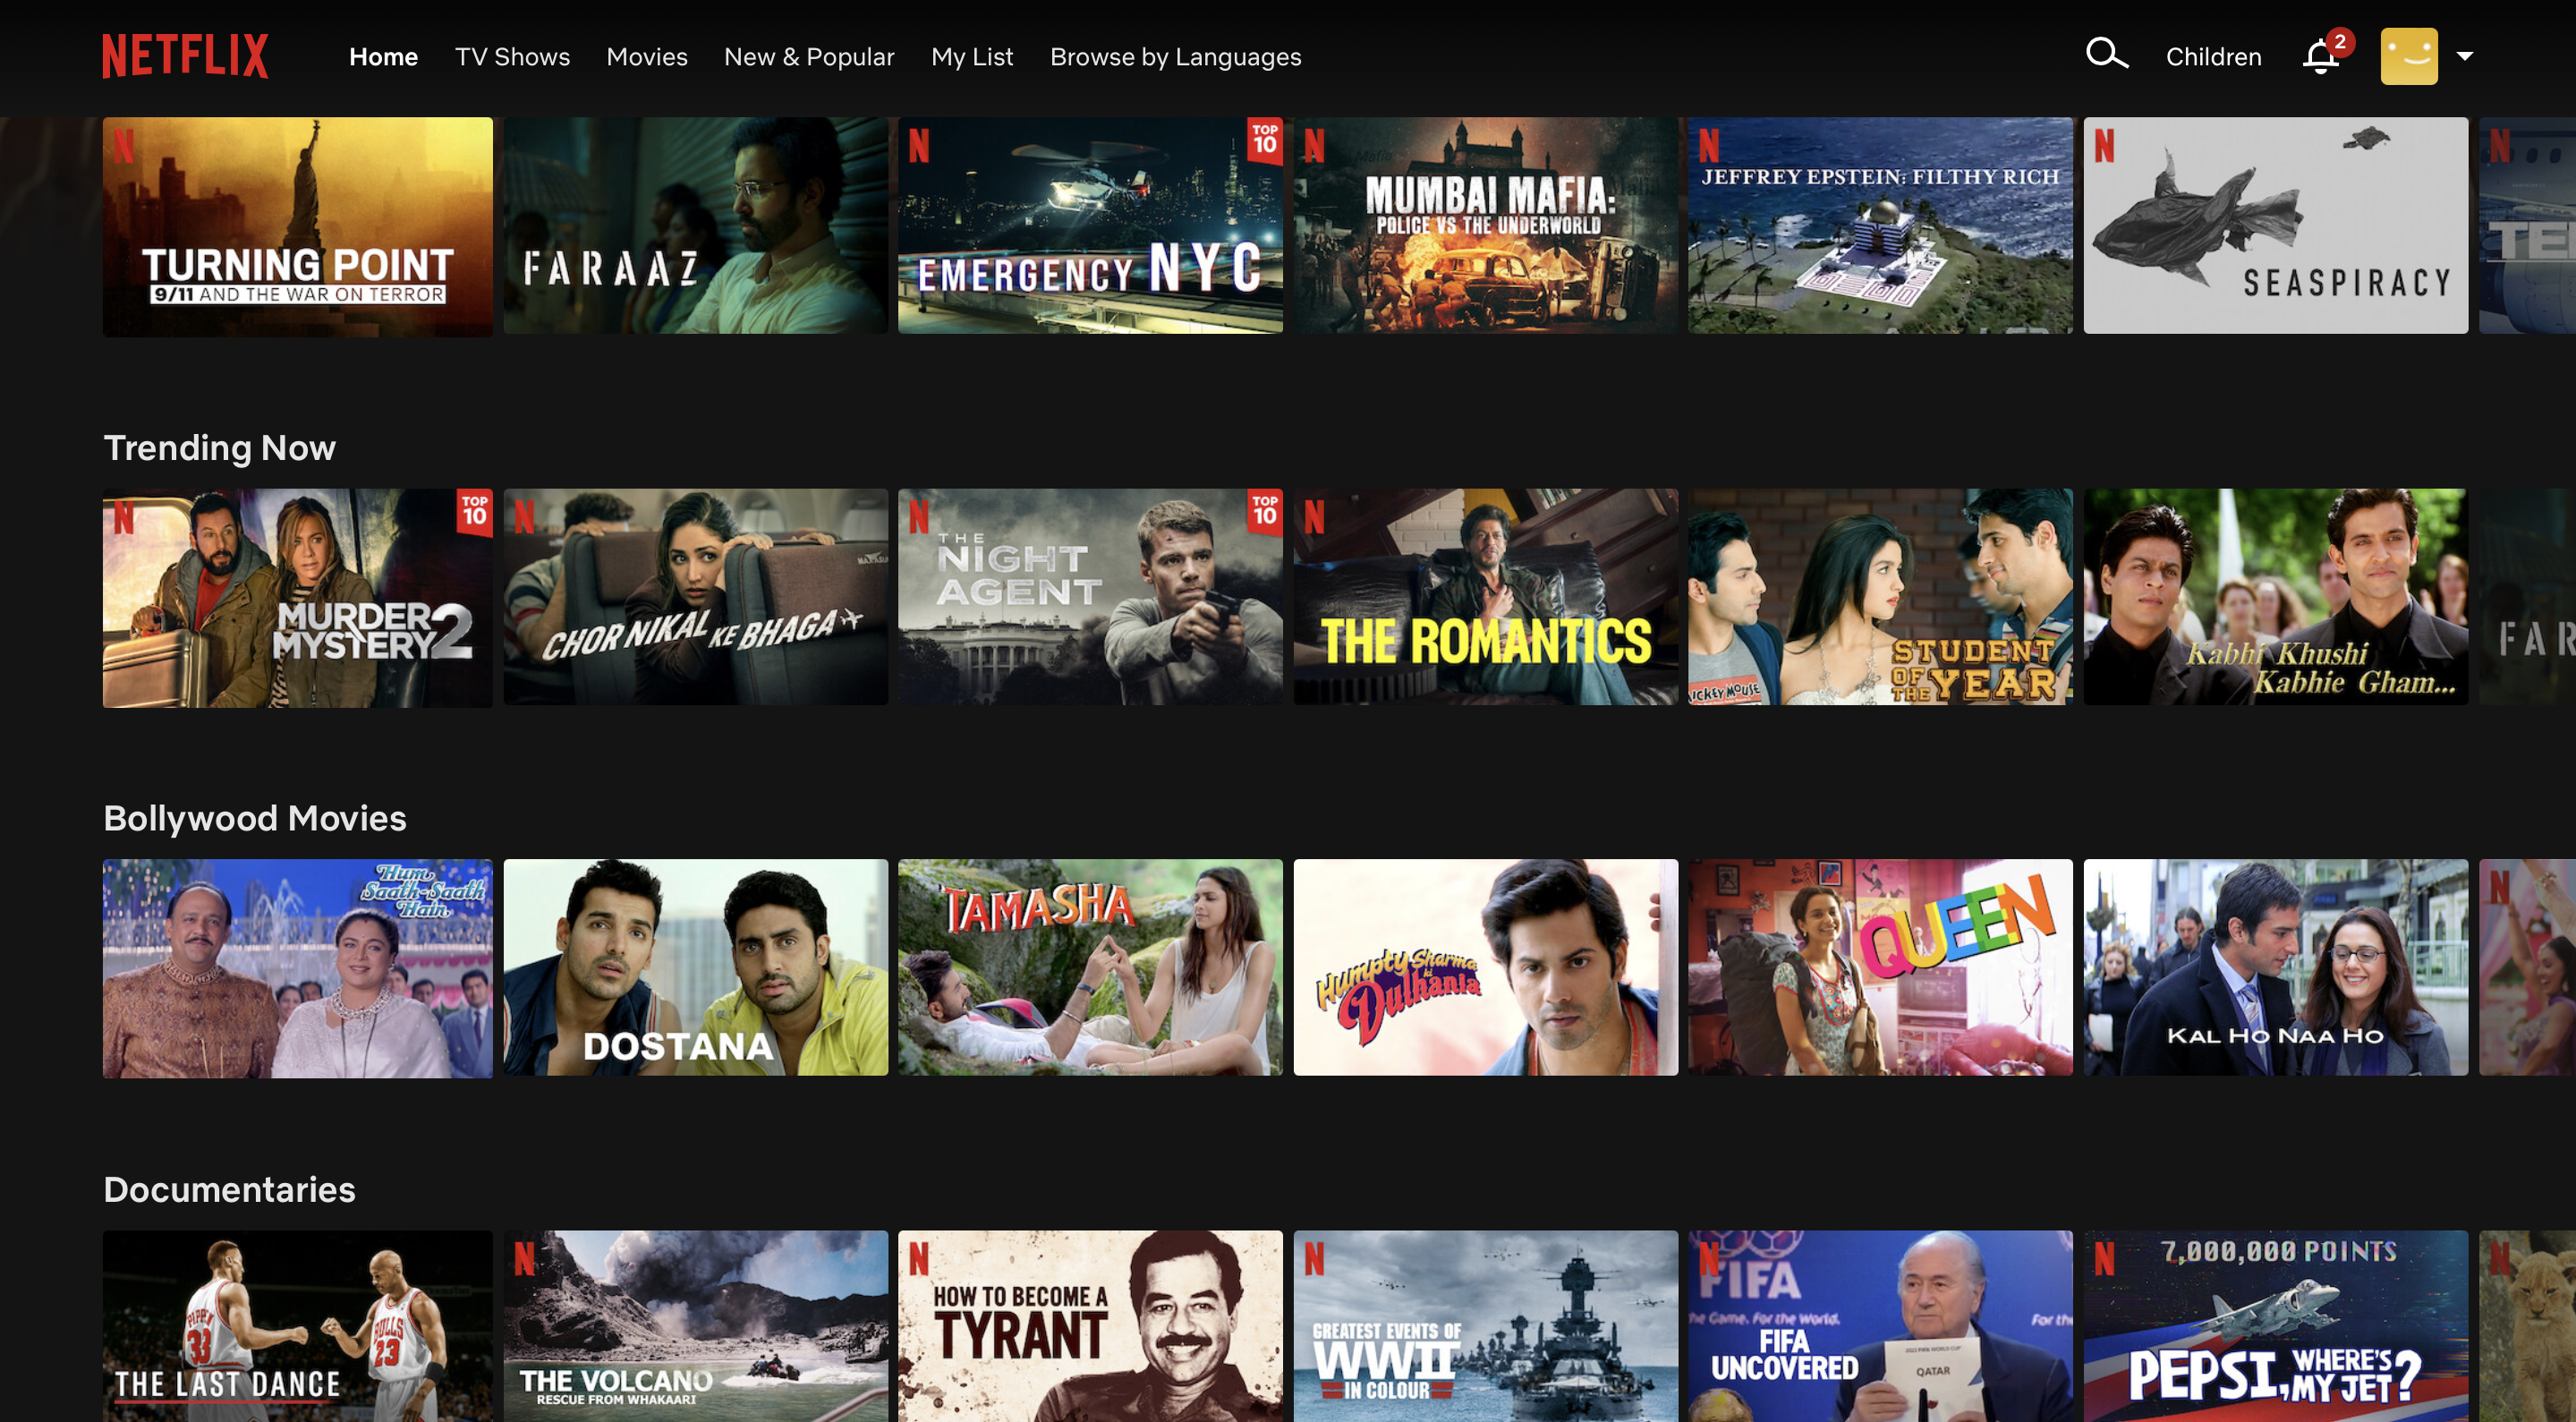

Before we begin, let's decide on the color palette

In [ ]:
sns.palplot(['#221f1f', '#b20710','#e50914','#f5f5f1'])
plt.title('Netflix Brand Palette', fontfamily = 'fantasy', fontsize = 50, y = 1)
plt.show()

In [ ]:
tl_dates = ['1997\nFounded', '1998\nMail Service ',
           '2003\nGoes Public','2007\nStreaming Service','2016\nInternational\nExpansion',
           '2023\nNetflix & Chill'] 
tl_x = [1,2, 4,5.3,8,9.5]


# these go on the numbers
tl_sub_x = [1.7,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","South America\nLaunch"]


# set figure and axes
fig, ax = plt.subplots(figsize = (15,4), constrained_layout = True)
ax.set_ylim(-1,1.75)
ax.set_xlim(0,10.5)

# the timeline line 
ax.axhline(0,xmin = 0.1, xmax = 0.9, c = '#4a4a4a', zorder = 1)

# timeline data points 
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 120, c = '#4a4a4a', zorder = 2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 30, c = '#fafafa', zorder = 3)

# Date text 

for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha = 'center',
           fontfamily = 'serif', fontweight = 'bold',
           color = '#221f1f', fontsize = 12)
    
    
# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# # Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a', fontsize=11) #if idx!=len(tl_sub_x) else '#4a4a4a'
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' ) #if idx!=len(tl_sub_x) else '#4a4a4a'


# Spine
for spine in ['left','top','right','bottom']:
    ax.spines[spine].set_visible(False)
    
# Ticks    
ax.set_xticks([])
ax.set_yticks([])

# Title 
ax.set_title('The Netflix Revolution: A Timeline of Game-Changing Moments', fontfamily = 'serif', 
             fontweight = 'bold', fontsize = 20, color = '#b20710')
ax.text(2.75,1.5 , 'From renting out DVDs to disrupting the OTT platform across the globe', 
        fontfamily = 'serif', color = '#221f1f', fontweight = 'bold')
plt.show()

In [ ]:
# Ratio of movies vs TV Shows 
x = netflix.groupby(['type'])['type'].count()
x

In [ ]:
netflix[netflix['type']=='2015']

In [ ]:
# netflix.drop(6066, inplace = True)

In [ ]:
y = len(netflix)
y

In [ ]:
r = round(x/y,2)
r

In [ ]:
mf_ratio = pd.DataFrame(r).T
mf_ratio

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6.5,2.0))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color = '#b20710', alpha = 0.9, label = 'Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left = mf_ratio['Movie'], 
        color = '#221f1f', alpha = 0.9, label = 'Female')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage 
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%",
               xy =(mf_ratio['Movie'][i]/2, i ),
               va = 'center', ha = 'center', fontsize = 40, fontweight = 'light', 
                fontfamily = 'serif', color = 'white')
    
    ax.annotate('Movie', 
                xy= (mf_ratio['Movie'][i]/2, -0.20), 
               va = 'center', ha = 'center', fontsize = 20, fontweight = 'light',
               fontfamily = 'serif', color = 'white')
    
# TV show percentage 
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
               xy = (mf_ratio['Movie'][i] + mf_ratio['TV Show'][i]/2, i),
               va = 'center', ha = 'center', fontsize = 25, fontweight = 'light',
               fontfamily = 'serif', color = 'white')
    
    ax.annotate('TV Show', 
                xy = (mf_ratio['Movie'][i] + mf_ratio['TV Show'][i]/2, -0.20),
               va = 'center', ha = 'center', fontsize = 15, fontweight = 'light',
               fontfamily = 'serif', color = 'white')

# Title and subtitle
fig.text(0.125, 1.00, 'Movies and TV Show distribution on Netflix', fontsize = 15, fontweight = 'bold', 
         fontfamily = 'serif')
fig.text(0.125, 0.93, 'Is it surprising that we watch a lot more movies than tv shows?', fontsize = 8, 
         fontweight = 'bold', fontfamily ='serif')

# removing the spines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

In [ ]:
# content comparison by country
# netflix.country.unique() # more than one country for most movies/tv shows
netflix.head(2)

#### Since the country column has more than one value, we will split the string and focus only on the first country or the primary country mentioned in the list... 

In [ ]:
netflix['primary_country'] = netflix['country'].apply(lambda x: x.split(',')[0])

#### The listed_in column also has multiple values, hence we implement the same stratergy but this, time watch out! Pay attention to the spacing in the strings

In [ ]:
netflix['genre'] = netflix['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
# netflix.head(2)

#### This blew my mind😱 So what we did here is, we brought uniform spacing and we did not drop any values from the strings we kept everything, split them by (,) and kept them all in a LIST

In [ ]:
# creating a dictionary for ratings 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [ ]:
# we create a new column - target_ratings where to give a more superficial peak into the ratings 
netflix['tv_parental_guidance'] = netflix['rating'].replace(ratings_ages)
# netflix.head(2)

In [ ]:
# Create a bar chart showing top 10 highest content producing countries
netflix.head(2)

In [ ]:
producer_countries = netflix.groupby(['primary_country'])['show_id'].count().sort_values(ascending = False)[:11]

In [ ]:
producer_countries.head()

In [ ]:
# plot 
color_map = ['#f5f5f1' for _ in range(11)]
color_map[0] = color_map[1] = color_map[2] = '#b20710'

fig, ax = plt.subplots(1,1, figsize = (18, 6))
ax.bar(producer_countries.index, producer_countries, width = 0.5, edgecolor = 'darkgray', linewidth = 0.6, color = color_map)

# annotations 
for i in producer_countries.index:
    ax.annotate(f"{producer_countries[i]}", 
    xy = (i, producer_countries[i]+150), va = 'center', ha = 'center', fontweight = 'light', fontfamily = 'serif')
    
# remove spine 
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    
# tick off the labels 
ax.set_xticklabels(producer_countries.index, fontfamily = 'serif', rotation = 0)

# Title and subtitle 
fig.text(0.09, 0.95 , 'Top 10 Countries on Netflix', fontsize = 25, fontfamily = 'serif', fontweight = 'bold');

### How does content vary by country?

In [ ]:
country_order = netflix['primary_country'].value_counts()[:11].index
data_q2q3 = netflix[['type','primary_country']].groupby('primary_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T/data_q2q3['sum']).T[['Movie','TV Show']].sort_values(by='Movie', ascending = False)[::-1]
data_q2q3_ratio
# barplot
fig, ax = plt.subplots(1,1, figsize = (18,6))
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color= '#b20710', alpha = 0.8, label = 'Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], 
        left = data_q2q3_ratio['Movie'], color = '#221f1f', alpha = 0.8, label = 'TV Show')
#axes
ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily = 'serif', fontsize = 15)

#annotation
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%",
    xy = (data_q2q3_ratio['Movie'][i]/2, i), va = 'center', ha = 'center', 
                fontfamily = 'serif', fontweight = 'bold', color = 'white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%",
    xy = (data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
    va = 'center', ha = 'center', fontfamily = 'serif', fontweight = 'bold', color = 'white')
    

#title
fig.text(0.09,0.95, 'Variation of Content with respect to Countries', fontsize = 25, 
         fontfamily = 'serif', fontweight='bold')

fig.text(0.75,0.90, 'Movie', fontfamily = 'serif', fontweight = 'bold', color = '#b20710', fontsize = 18)
fig.text(0.80, 0.90, '|', color = 'black', fontweight = 'bold', fontsize = 18)
fig.text(0.81, 0.90, 'TV Shows', fontfamily = 'serif', color = '#221f1f', fontsize = 18, fontweight = 'bold')
;

### Distribution of Ratings 

In [ ]:
netflix.rating.unique()

In [ ]:
netflix[netflix['rating']=='2015']

In [ ]:
netflix.drop(6066, inplace = True)

In [ ]:
netflix.rating.unique()

In [ ]:
netflix[netflix['rating']=='74 min']

In [ ]:
netflix.drop(5541, inplace = True)

In [ ]:
netflix[netflix['rating']=='84 min']

In [ ]:
netflix.drop(5794, inplace = True)

In [ ]:
netflix[netflix['rating'] == '66 min']

In [ ]:
netflix.drop(5813,inplace = True)

In [ ]:
netflix.head()

In [ ]:
counts = netflix.groupby(['rating','type'])['show_id'].count()
counts_df = counts.reset_index().pivot(index = 'rating', columns = 'type', values = 'show_id').fillna(0)
counts_df['Total'] = counts_df['Movie']+counts_df['TV Show']
counts_df = counts_df.sort_values('Total', ascending = False)
counts_df

rating = list(counts_df.index)
rating

In [ ]:
plot = netflix.groupby('type')['rating'].value_counts().unstack().sort_index(ascending = False).fillna(0).astype(int)[rating]

movie = plot.loc['Movie']
tv_shows = - plot.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize = (12,6))
ax.bar(movie.index, movie, width = 0.5, color = '#b20710', alpha = 0.8, label = 'Movie')
ax.bar(tv_shows.index, tv_shows, width = 0.5, color = '#221f1f', alpha = 0.8, label = 'TV Shows')

#remove ticks 
# ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels(plot.columns, fontfamily = 'serif')

# remove spine 
for s in ['top', 'right', 'left', 'bottom']:
    ax.spines[s].set_visible(False)
    
# Annotations
for i in movie.index:
    ax.annotate(f"{movie[i]}",
               xy = (i, movie[i]+60),
               va = 'center', ha = 'center', fontfamily = 'serif', fontweight = 'light', color = '#b20710')
    
for i in tv_shows.index:
    ax.annotate(f"{-tv_shows[i]}",
               xy = (i, tv_shows[i]-65),
               va = 'center', ha = 'center', fontfamily = 'serif', fontweight = 'light', color = '#221f1f')


# title 
fig.text(0.30, 0.95, 'Content with respect to Ratings', fontfamily = 'serif', fontweight = 'bold', color = 'black', fontsize = 18)
fig.text(0.75, 0.90, 'Movie', fontfamily = 'serif', fontweight = 'bold', color = '#221f1f')
fig.text(0.80, 0.90, '|', fontweight = 'bold', color = 'black')
fig.text(0.81, 0.90, 'TV Shows', fontweight = 'bold', fontfamily='serif', color = '#b20710');


### Content added over the years 

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
color = ['#b20710', '#221f1f']

for i, j in enumerate(netflix.type.value_counts().index):
    j_rel = netflix[netflix['type'] == j]['year_added'].value_counts().sort_index()
    ax.plot(j_rel.index, j_rel, color = color[i], label = j)
    ax.fill_between(j_rel.index, 0, j_rel, color = color[i], alpha = 0.9)
#     for year, count in enumerate(j_rel):
#         ax.annotate(str(count), xy = (year,count), ha ='center', va='bottom', color = 'blue', fontfamily = 'serif')
    
# ticks 
ax.yaxis.tick_right() # moving the y axis values to the right hand side
ax.axhline(y=0, color = 'black', linewidth = 1, alpha = 0.7) # drawing a line at y = 0 

# removing spines 
for s in ['top', 'right','bottom', 'left']:
    ax.spines[s].set_visible(False)
    
ax.tick_params(axis=u'both', which=u'both',length=0)


ax.set_title('Content uploaded on Netflix over the years', fontfamily = 'serif', fontweight = 'bold')
fig.text(0.13, 0.2, 'Movie', color = '#b20710', fontweight = 'bold', fontfamily = 'serif')
fig.text(0.18, 0.2, '|', color = 'black', fontweight = 'bold', fontfamily = 'serif')
fig.text(0.19, 0.2, 'TV Shows', color = '#221f1f', fontweight = 'bold', fontfamily = 'serif');

### If you're a creator when is a good time for you to upload your content on Netflix?

In [ ]:
month_order = ['January', 'February','March','April','May','June','July','September','October','November','December']

In [ ]:
netflix['month_name_added'] = pd.Categorical(netflix['month_name_added'], categories=month_order, ordered = True)

polar_netflix = netflix.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis = 0).T

polar_netflix['Value Sum'] = polar_netflix['TV Show']+polar_netflix['Movie']
polar_netflix = polar_netflix.reset_index()

polar_netflix = polar_netflix.sort_values(by = 'month_name_added', ascending = False)

color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[10] = '#b20710'
polar_netflix

plt.figure(figsize = (4,4))
ax = plt.subplot(111, polar = True)
plt.axis('off')

upperLimit = 30
lowerLimit = 1
labelPadding = 30

max = polar_netflix['Value Sum'].max()
min = polar_netflix['Value Sum'].min()

slope = (max - lowerLimit)/max
heights = slope * polar_netflix['Value Sum']+lowerLimit
width = 2*np.pi/len(polar_netflix.index)

# computing the angle each bar is centered on
indexes = list(range(1, len(polar_netflix.index)+1))
angles = [element * width for element in indexes]
angles

# draw bars 
bars = ax.bar(x = angles, height=heights, width = width, bottom = lowerLimit, linewidth =2, 
              edgecolor ='white',color = color_map, alpha = 0.8)

# Adding labels 
for bar, angle, height, label in zip(bars, angles, heights, polar_netflix['month_name_added']):
        rotation = np.rad2deg(angle)
        # flipping some labels upside down
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = 'right'
            rotation = rotation + 180
        else:
                alignment = 'left'
        # adding labels 
        ax.text(x = angle, y = lowerLimit + bar.get_height()+labelPadding, s=label, ha = alignment, va = 'center',
        fontsize = 10, fontfamily = 'serif', rotation = rotation, rotation_mode = 'anchor')


### Demographic Targeting by Netflix 